##### Here I'll calculate the RSI over a stock price and plot it

In [1]:
import datetime as dt
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

##### Here define the ticker that we'll look. Also de start date and end date

In [3]:
ticker = 'SPY'
start_date = dt.datetime(2020,1,1)
end_date = dt.datetime.now()

In [4]:
data = yf.download("SPY", start=start_date.strftime("%Y-%m-%d"), end=end_date.strftime("%Y-%m-%d"))

[*********************100%***********************]  1 of 1 completed


In [5]:
delta_close = data['Adj Close'].diff(1)
delta_close.dropna(inplace=True)

In [7]:
positive_values = delta_close.copy()
positive_values[positive_values < 0] = 0
negative_values = delta_close.copy()
negative_values[negative_values > 0] = 0

In [8]:
days = 14
average_gain = positive_values.rolling(window=days).mean()
average_loss = abs(negative_values.rolling(window=days).mean())

##### Define the RSI (Relative Strenge Index

In [10]:
relative_strenge = average_gain / average_loss
RSI = 100.0 - (100.0 / (1.0 + relative_strenge))

##### Combine a dataframe with Adj Close and RSI

In [11]:
combined_df = pd.DataFrame()
combined_df['Adj Close'] = data['Adj Close']
combined_df['RSI'] = RSI

##### Create the plots

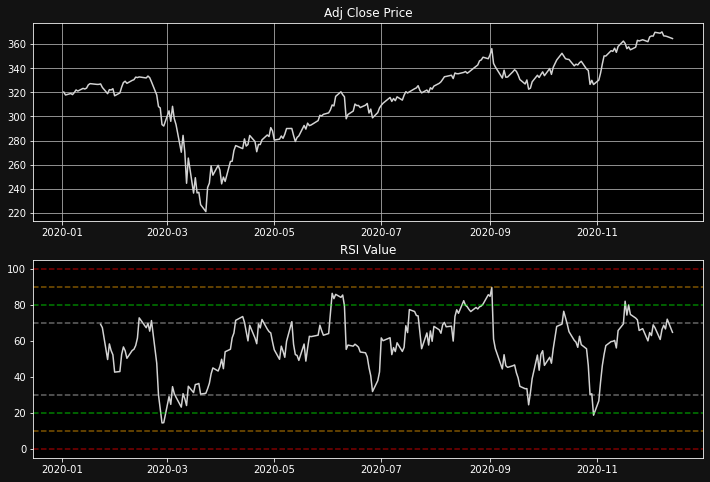

In [18]:
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
ax1.plot(combined_df.index, combined_df['Adj Close'], color = 'lightgray')
ax1.set_title("Adj Close Price", color = 'white')
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.set_facecolor('black')
ax1.figure.set_facecolor('#121212')
ax1.spines['bottom'].set_color('white')
ax1.spines['top'].set_color('white')
ax1.spines['left'].set_color('white')
ax1.spines['right'].set_color('white')
ax1.xaxis.label.set_color('white')
ax1.yaxis.label.set_color('white')
ax1.tick_params(axis = 'x', colors = 'white')
ax1.tick_params(axis = 'y', colors = 'white')

ax2 = plt.subplot(212, sharex = ax1)
ax2.plot(combined_df.index, combined_df['RSI'], color = 'lightgray')
ax2.set_title("RSI Value", color = 'white')
ax2.grid(False)
ax2.axhline(0, linestyle = '--', alpha = 0.5, color = '#ff0000')
ax2.axhline(10, linestyle = '--', alpha = 0.5, color = '#ffaa00')
ax2.axhline(20, linestyle = '--', alpha = 0.5, color = '#00ff00')
ax2.axhline(30, linestyle = '--', alpha = 0.5, color = '#cccccc')
ax2.axhline(70, linestyle = '--', alpha = 0.5, color = '#cccccc')
ax2.axhline(80, linestyle = '--', alpha = 0.5, color = '#00ff00')
ax2.axhline(90, linestyle = '--', alpha = 0.5, color = '#ffaa00')
ax2.axhline(100, linestyle = '--', alpha = 0.5, color = '#ff0000')
ax2.set_axisbelow(True)
ax2.set_facecolor('black')
ax2.figure.set_facecolor('#121212')
ax2.spines['bottom'].set_color('white')
ax2.spines['top'].set_color('white')
ax2.spines['left'].set_color('white')
ax2.spines['right'].set_color('white')
ax2.xaxis.label.set_color('white')
ax2.yaxis.label.set_color('white')
ax2.tick_params(axis = 'x', colors = 'white')
ax2.tick_params(axis = 'y', colors = 'white')

plt.show()